In [38]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Read Data
df = pd.read_csv("Data/diabetes_prediction_dataset_cleaned.csv")
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140,0
1,1,Female,54.0,0,0,current,27.32,6.6,80,0
2,2,Male,28.0,0,0,never,27.32,5.7,158,0
3,3,Female,36.0,0,0,current,23.45,5.0,155,0
4,4,Male,76.0,1,1,current,20.14,4.8,155,0


Check For Duplicates

In [40]:
df.duplicated().sum()

np.int64(0)

There is 925 Duplicates, so we will drop them, reset the index

In [41]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop_duplicates(keep='first')
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.duplicated().sum()

np.int64(0)

In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   hypertension         100000 non-null  int64  
 4   heart_disease        100000 non-null  int64  
 5   smoking_history      100000 non-null  object 
 6   bmi                  100000 non-null  float64
 7   HbA1c_level          100000 non-null  float64
 8   blood_glucose_level  100000 non-null  int64  
 9   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [43]:
df_cleaned.describe()

,Unnamed: 0,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,28867.657797,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24999.750000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,49999.500000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,74999.250000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,99999.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Show Values of classes which should have some certain values

In [44]:
#Check For Impossible Values
print(df_cleaned['diabetes'].value_counts())
print("=====================")
print(df_cleaned['gender'].value_counts())
print("=====================")
print(df_cleaned["heart_disease"].value_counts())
print("=====================")
print(df_cleaned["hypertension"].value_counts())
print("=====================")
print(df_cleaned["smoking_history"].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
smoking_history
never          53943
former         21708
current        10229
ever            7606
not current     6514
Name: count, dtype: int64


Drop Other from gender as it is small porportion of the data

In [45]:
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Other']
df_cleaned['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [46]:
df_cleaned['diabetes'].value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

In [47]:
df_cleaned[df_cleaned['age'] != df_cleaned['age'].astype(int)]

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,155,Female,0.08,0,0,never,14.43,6.5,160,0
218,218,Female,0.56,0,0,never,16.85,5.0,140,0
241,241,Male,0.88,0,0,never,17.49,6.0,140,0
268,268,Female,0.16,0,0,never,12.15,6.6,100,0
396,396,Male,0.16,0,0,never,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...,...
99536,99536,Female,0.40,0,0,never,16.66,3.5,140,0
99629,99629,Female,0.64,0,0,never,17.58,6.1,140,0
99778,99778,Female,0.32,0,0,never,12.26,5.8,126,0
99911,99911,Female,0.32,0,0,never,18.37,3.5,80,0


As the age values that have floating numbers are between 0.08 and 1.48 which refers to childs we will keep them for now

Now let's see if there is any outliers

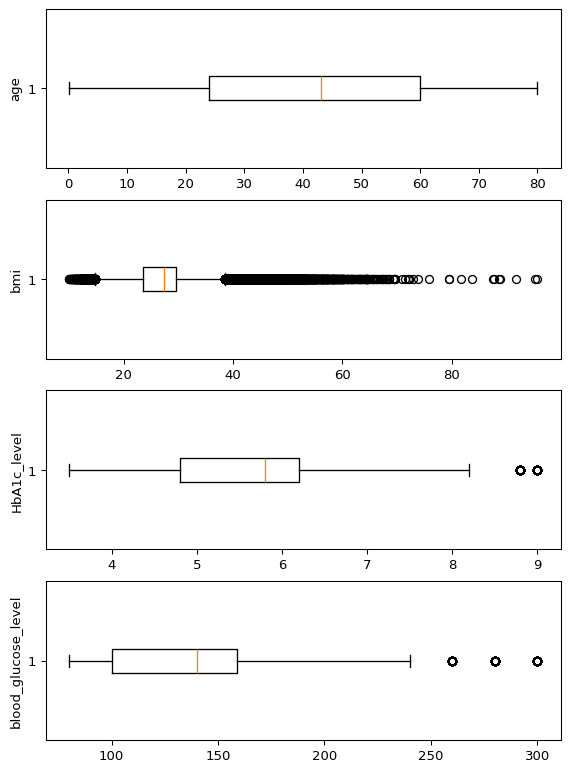

In [48]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
specefic_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_df = df_cleaned[specefic_cols]
for col in numeric_df.columns:
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

There is no Outliers in Age, and some outliers in HbA1c_level, blood_glucose_level, and BMI

We will make the outliers as nulls

In [49]:
import numpy as np

# Step 1: Set outliers in HbA1c, blood_glucose, and bmi to NaN
outlier_cols = ['HbA1c_level', 'blood_glucose_level', 'bmi']
df_impute = df_cleaned.copy()

for col in outlier_cols:
    q1, q3 = np.percentile(df_impute[col], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Set outliers to NaN
    df_impute.loc[(df_impute[col] < lower) | (df_impute[col] > upper), col] = np.nan

In [50]:
df_impute["bmi"].isnull().sum()

np.int64(7085)

Taking copies to not run from the begining

In [51]:
df_cleaned_recovery = df_cleaned.copy()

In [52]:
df_cleaned = df_cleaned_recovery.copy()

In [53]:
df_cleaned.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140,0
1,1,Female,54.0,0,0,current,27.32,6.6,80,0
2,2,Male,28.0,0,0,never,27.32,5.7,158,0
3,3,Female,36.0,0,0,current,23.45,5.0,155,0
4,4,Male,76.0,1,1,current,20.14,4.8,155,0


Imputing the null values which was the outliers using median impputation

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Columns to impute using median
median_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# Median imputation pipeline
median_pipe = Pipeline([
    ('median', SimpleImputer(strategy='median'))
])

# Combine imputers (only one in this case)
imputer = ColumnTransformer([
    ('median', median_pipe, median_cols)
])

# Apply imputation
imputed_array = imputer.fit_transform(df_impute[median_cols])

# Replace original columns with imputed values
df_impute[median_cols] = imputed_array

# Final cleaned DataFrame
df_cleaned = df_impute


In [55]:
df_cleaned.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,1,Female,54.0,0,0,current,27.32,6.6,80.0,0
2,2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,4,Male,76.0,1,1,current,20.14,4.8,155.0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   hypertension         100000 non-null  int64  
 4   heart_disease        100000 non-null  int64  
 5   smoking_history      100000 non-null  object 
 6   bmi                  100000 non-null  float64
 7   HbA1c_level          100000 non-null  float64
 8   blood_glucose_level  100000 non-null  int64  
 9   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [57]:
df_impute['bmi'].isnull().sum()

np.int64(0)

Show the outliers now

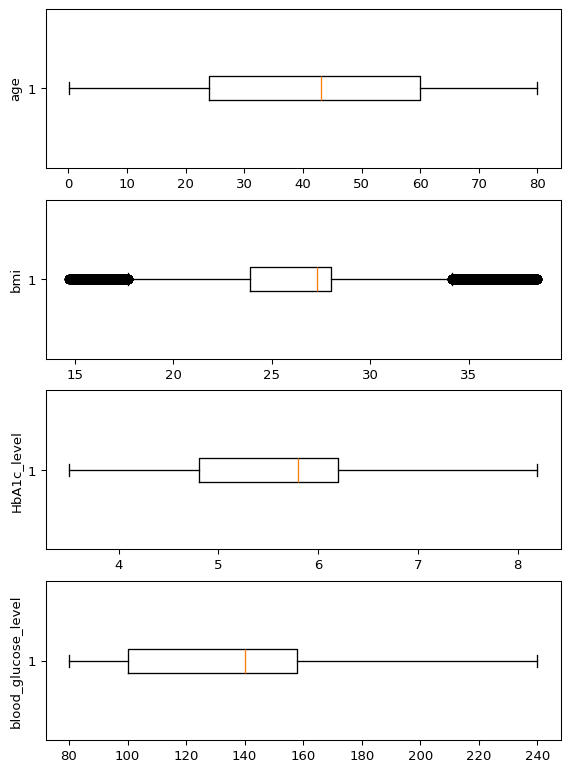

In [58]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
specefic_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_df = df_cleaned[specefic_cols]
for col in numeric_df.columns:
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

As we can see no outliers in blood_glucose_level, HbA1c_level, and age. But new outliers generated in BMI

Now let's encode the genders and smoking_history

In [59]:
df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1})

df_cleaned['smoking_history'] = df_cleaned['smoking_history'].map({
    'never': 0,
    'not current': 1,
    'former': 2,
    'ever': 3,
    'current': 4
})


Now we will do correlation analysis and calculate teh correlation between each feature and daibetes

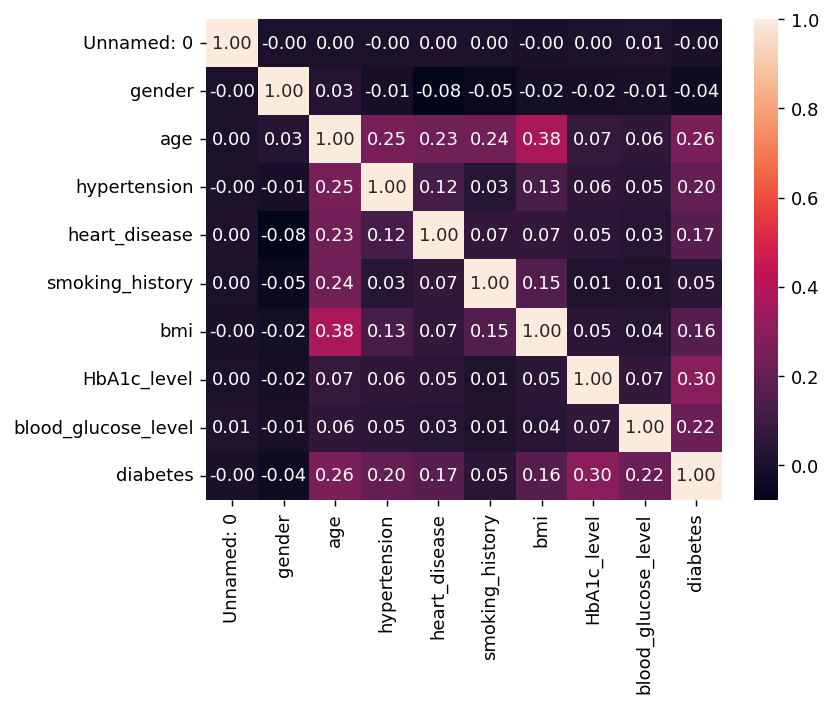

diabetes               1.000000
HbA1c_level            0.295872
age                    0.257999
blood_glucose_level    0.219278
hypertension           0.197811
heart_disease          0.171718
bmi                    0.162423
smoking_history        0.046131
Unnamed: 0            -0.004986
gender                -0.037623
Name: diabetes, dtype: float64

In [60]:
#correlation
corr = df_cleaned.corr()

plt.figure(dpi=130)
sns.heatmap(df_cleaned.corr(), annot=True, fmt= '.2f')
plt.show()
corr['diabetes'].sort_values(ascending = False)


Show Diabetes Porportion

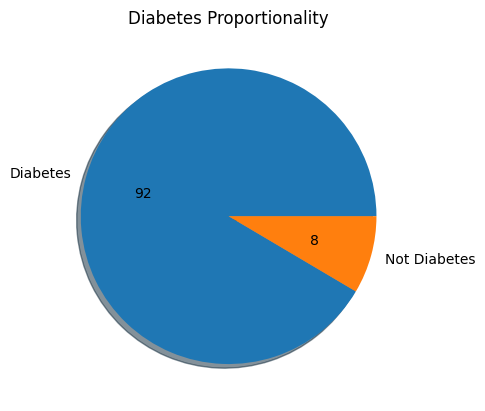

In [61]:
plt.pie(df.diabetes.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Diabetes Proportionality')
plt.show()

We will check normality of the features

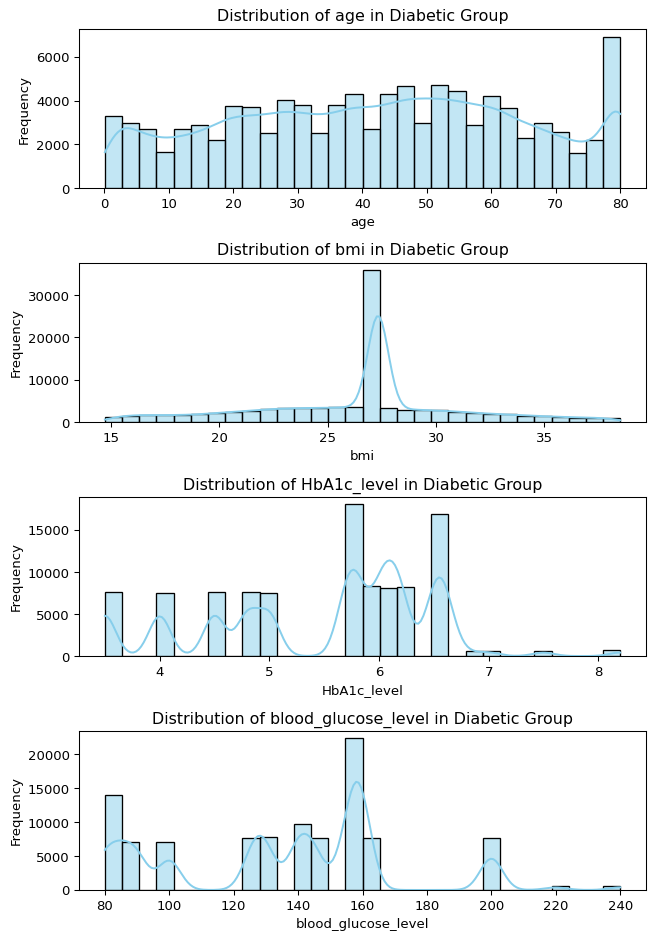

In [62]:
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
for i, col in enumerate(specefic_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue', ax=axs[i])
    axs[i].set_title(f"Distribution of {col} in Diabetic Group")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


BMI is the only one that is normally distributed feature

Now let's do Feature importance Analysis using randomforest

In [63]:
from sklearn.ensemble import RandomForestClassifier

X = df_cleaned.drop(columns='diabetes')
y = df_cleaned['diabetes']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")


Unnamed: 0: 0.144
gender: 0.014
age: 0.122
hypertension: 0.019
heart_disease: 0.013
smoking_history: 0.033
bmi: 0.108
HbA1c_level: 0.344
blood_glucose_level: 0.205


In [64]:
df_cleaned['diabetes'].value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

In [65]:
df_cleaned.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1,80.0,0,1,0,25.19,6.6,140.0,0
1,1,1,54.0,0,0,4,27.32,6.6,80.0,0
2,2,0,28.0,0,0,0,27.32,5.7,158.0,0
3,3,1,36.0,0,0,4,23.45,5.0,155.0,0
4,4,0,76.0,1,1,4,20.14,4.8,155.0,0


In [66]:
df_cleaned.to_csv("Data/diabetes_prediction_dataset_cleaned_imputed_outliers_and_smoking.csv")